# Tau Leaping Method for SRNs

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Gene Reaction Netwok

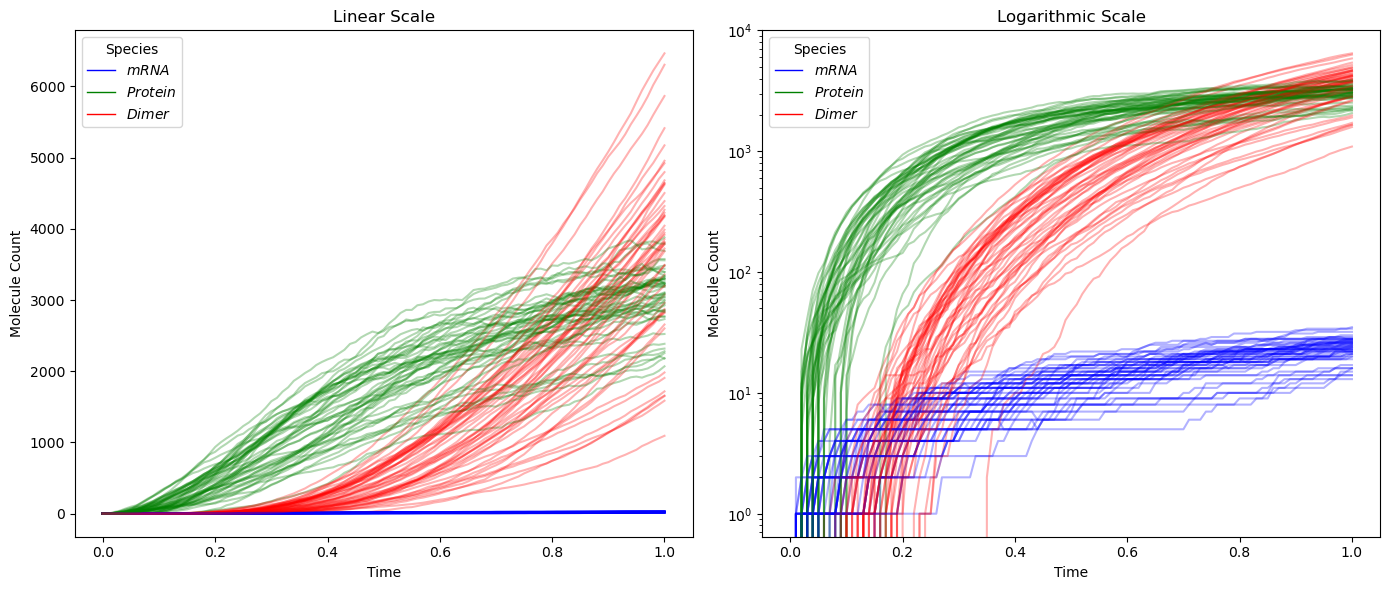

In [13]:
from matplotlib.lines import Line2D  # Import Line2D for customized legend

# Initialize parameters for SRN
initial_x = [0, 0, 0]  # Initial populations of A, B, and C
T = 1.0                  # Simulation end time
τ =  0.01                 # Tau (time leap size)
k1, k2, k3, k4, k5 = 25, 10**3, 10**-3, 0.1, 1  # Rate constants for reactions 1,2,3,4, & 5
num_simulations = 50      # Number of simulations

# Stoichiometry matrix for reactions
ν = [[+1, 0, 0],       # Reaction 1: DNA -> mRNA
     [0, +1, 0],       # Reaction 2: mRNA -> mRNA + Protein
     [0, -2, +1],       # Reaction 3: 2Protein -> Dimer
     [-1, 0, 0],        # Reaction 4: mRNA -> DNA
     [0, -1, 0]]       # Reaction 5: Protein -> DNA

# Define propensity functions
def calculate_propensities(state):
    return [k1, k2*state[0], k3*state[1]*(state[1]-1),
           k4*state[0], k5*state[1]]  # Propensities for reactions

# Store results from multiple simulations
all_times = []
all_mRNA = []
all_Protein = []
all_Dimer = []

for sim in range(num_simulations):
    # Initialize parameters for each simulation
    x = initial_x.copy()
    t = 0.0
    times = [t]
    mRNA = [x[0]]
    Protein = [x[1]]
    Dimer = [x[2]]
    
    # Tau-Leap simulation loop
    while t < T:
        # Step 1: Calculate propensities for each reaction
        a = calculate_propensities(x)
        # Step 2: Generate Poisson random numbers for each reaction
        p = [np.random.poisson(a[i] * τ) for i in range(len(a))]
        # Step 3: Update the state vector x
        x = [x[j] + sum(p[i] * ν[i][j] for i in range(len(p))) for j in range(len(x))]
        # Step 4: Update time
        t += τ
        # Store time and populations for plotting
        times.append(t)
        mRNA.append(x[0])
        Protein.append(x[1])
        Dimer.append(x[2])
    
    # Append results of the simulation
    all_times.append(times)
    all_mRNA.append(mRNA)
    all_Protein.append(Protein)
    all_Dimer.append(Dimer)

# Set up a 1x2 subplot layout
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plotting the time evolution of A, B, and C with distinct colors
for times, mRNA_counts, Protein_counts, Dimer_counts in zip(all_times, all_mRNA, all_Protein, all_Dimer):
    # Linear scale plot (LHS)
    ax1.plot(times, mRNA_counts, color='blue', label='$mRNA$', alpha=0.3)
    ax1.plot(times, Protein_counts, color='green', label='$Protein$', alpha=0.3)
    ax1.plot(times, Dimer_counts, color='red', label='$Dimer$', alpha=0.3)
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Molecule Count')
    ax1.set_title('Linear Scale')
    
    # Log scale plot (RHS)
    ax2.plot(times, mRNA_counts, color='blue', label='$mRNA$', alpha=0.3)
    ax2.plot(times, Protein_counts, color='green', label='$Protein$', alpha=0.3)
    ax2.plot(times, Dimer_counts, color='red', label='$Dimer$', alpha=0.3)
    ax2.set_xlabel('Time')
    ax2.set_ylabel('Molecule Count')
    ax2.set_yscale('log')
    ax2.set_title('Logarithmic Scale')

    
# Custom legend with color codes
custom_lines = [
    Line2D([0], [0], color='blue', lw=1, label='$mRNA$'),
    Line2D([0], [0], color='green', lw=1, label='$Protein$'),
    Line2D([0], [0], color='red', lw=1, label='$Dimer$')]


# # Add legend once for each subplot
ax1.legend(handles=custom_lines, loc='upper left', title='Species')
ax2.legend(handles=custom_lines, loc='upper left', title='Species')

plt.tight_layout()
plt.show()
